In [1]:
# ---------------------------------------------------------------------------------------------- 
# the purpose of this code is to classify mnist data with pretty tensor
# when i write this code, i refered to https://github.com/Hvass-Labs/TensorFlow-Tutorials
# I am not so good at English. So please be good to understand my awkward English. 
# ----------------------------------------------------------------------------------------------

In [2]:
# import modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import prettytensor as pt

In [3]:
# import input_data
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/',one_hot = True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [4]:
# parameta
img_size = 28
img_shape = (28,28)
img_flat_length = 28*28*1
num_channel = 1
filter_size1 = 5
num_filters1 = 16
filter_size2 = 5
num_filters2 = 36
num_classes = 10
batch_size = 100
training_epoch = 32
learning_rate = 0.002

In [5]:
# labels of True_test_Data
Y_test_cls = np.argmax(data.test.labels,1)

In [6]:
# function for plotting images
def plot_img(images,Y_true_cls,Y_pred_cls = None):
    assert len(images) == len(Y_true_cls) == 9
    
    fig,axes = plt.subplots(3,3)
    fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    for i,ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_shape), cmap ='binary')
        
        if Y_pred_cls is None:
            xlabel = "True:{0}".format(Y_true_cls[i])
        else:
            xlabel = "True:{0}, Pred:{1}".format(Y_true_cls[i],Y_pred_cls[i])
        ax.set_xlabel(xlabel)
        
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()   

In [7]:
X = tf.placeholder(tf.float32 ,shape = [None,img_flat_length])

X_img = tf.reshape(X,[-1,img_size,img_size,num_channel])

Y = tf.placeholder(tf.float32, shape = [None, num_classes])

In [8]:
# wrap X_img with pretty tensor
X_pretty = pt.wrap(X_img)

In [9]:
# make convolutional neural network and fully connected network with pretty tensor
with pt.defaults_scope(activation_fn = tf.nn.relu):
    Y_pred,cost = X_pretty.\
        conv2d(kernel = 5, depth = num_filters1, name ="conv_layer1").\
        max_pool(kernel = 2, stride = 2).\
        conv2d(kernel = 5, depth = num_filters2, name = "conv_layer2").\
        max_pool(kernel = 2, stride = 2).\
        flatten().\
        fully_connected(size = 128, name = "fc_1").\
        softmax_classifier(num_classes = num_classes, labels = Y)   

In [10]:
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
Y_pred_cls = tf.argmax(Y_pred,1)

In [11]:
is_correct = tf.equal(Y_pred_cls,tf.argmax(Y,1))

Accuracy = tf.reduce_mean(tf.cast(is_correct,dtype = tf.float32))

In [12]:
# create Session and initialize all variables
sess = tf.Session()
sess.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [13]:
# training
for epoch in range(training_epoch):
    cost_val = 0
    total_batch = int(data.train.num_examples/batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = data.train.next_batch(batch_size)
        c,_ = sess.run([cost,optimizer], feed_dict = {X:batch_xs,Y:batch_ys})
        cost_val += c/total_batch
    print("epoch:",epoch ,"cost_val:",cost_val)

epoch: 0 cost_val: 0.140985810709
epoch: 1 cost_val: 0.0408402407421
epoch: 2 cost_val: 0.0296938697209
epoch: 3 cost_val: 0.0211919313496
epoch: 4 cost_val: 0.014675883152
epoch: 5 cost_val: 0.0136236179241
epoch: 6 cost_val: 0.0134599432277
epoch: 7 cost_val: 0.0101465872702
epoch: 8 cost_val: 0.00899297732637
epoch: 9 cost_val: 0.0101946207989
epoch: 10 cost_val: 0.00865510522459
epoch: 11 cost_val: 0.00772919782807
epoch: 12 cost_val: 0.00650698481909
epoch: 13 cost_val: 0.0056659844751
epoch: 14 cost_val: 0.0044472361418
epoch: 15 cost_val: 0.00592960693713
epoch: 16 cost_val: 0.00522331116811
epoch: 17 cost_val: 0.0066282322753
epoch: 18 cost_val: 0.00569080195179
epoch: 19 cost_val: 0.005281828662
epoch: 20 cost_val: 0.00369785539264
epoch: 21 cost_val: 0.00566620455501
epoch: 22 cost_val: 0.00270179637554
epoch: 23 cost_val: 0.00172048433831
epoch: 24 cost_val: 0.00686959913594
epoch: 25 cost_val: 0.00747851804317
epoch: 26 cost_val: 0.00398931887464
epoch: 27 cost_val: 0.00412

In [14]:
# calculate Accuracy
Accuracy_val,correct,Y_pred_cls1 = sess.run([Accuracy,is_correct,Y_pred_cls], feed_dict = {X:data.test.images,Y:data.test.labels})
print("Accuracy is ", Accuracy_val)

Accuracy is  0.9919


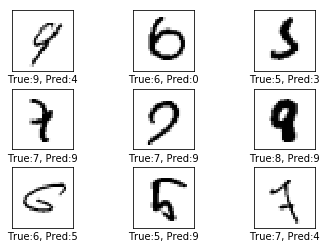

In [15]:
# plot examples of error
def plot_examples_error():
    incorrect = (correct == False)
    
    q = data.test.images[incorrect]
    w = Y_test_cls[incorrect]
    e = Y_pred_cls1[incorrect]
    
    q = q[0:9]
    w = w[0:9]
    e = e[0:9]
    
    plot_img(q,w,e)

plot_examples_error()

[[ 979    0    0    0    0    0    1    0    0    0]
 [   1 1130    0    2    0    0    2    0    0    0]
 [   1    0 1026    1    1    0    0    2    1    0]
 [   0    0    1 1005    0    3    0    0    1    0]
 [   0    0    0    0  976    0    1    0    0    5]
 [   2    0    0    6    0  881    1    0    0    2]
 [   1    2    0    0    0    3  951    0    1    0]
 [   0    3    2    0    1    0    0 1008    1   13]
 [   3    0    0    1    0    1    0    0  966    3]
 [   0    0    0    0    7    1    0    2    2  997]]


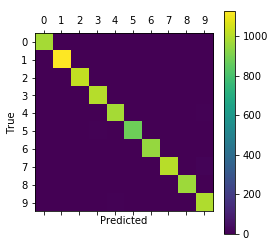

In [16]:
# create confusion matrix
def plot_confusion_matrix():
    data_true1 = Y_test_cls
    data_pred1 = Y_pred_cls1
    
    cm = confusion_matrix(data_true1,data_pred1)
    
    print(cm)
    plt.matshow(cm)
    
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    plt.show()

plot_confusion_matrix()